# Notebook para testes
Aqui testo as funções.

In [1]:
import myfunctions as my

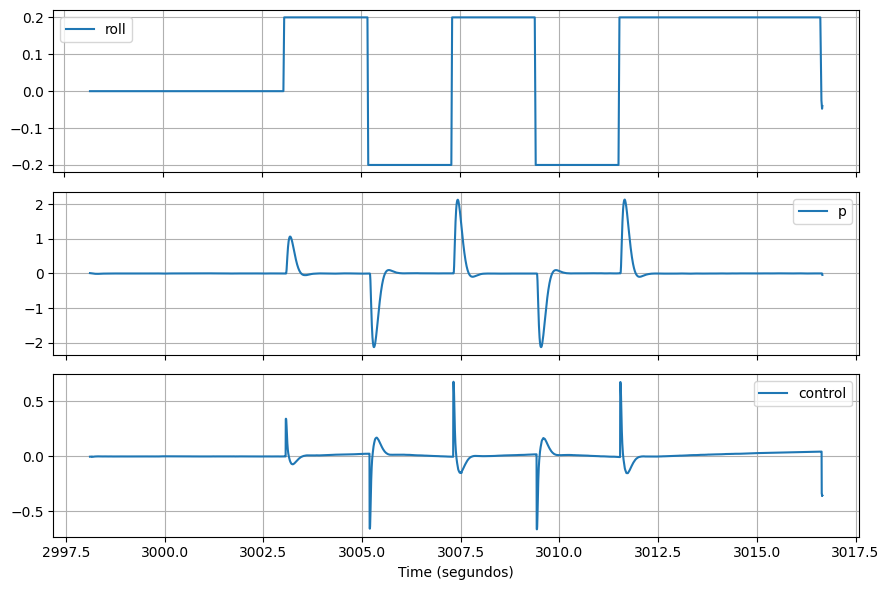

In [2]:
file_path = 'ulogs/log_30_2024-9-17-10-32-27.ulg'
t_roll, roll, t_p, p, t_cont, cont = my.get_euler_taxa(file_path = file_path, angle='roll', taxa='p', sinal=[-1,1,1,-1])